In [1]:
import numpy as np
import matplotlib.pyplot as plt

import glob
import sys
sys.path.append(r'C:\Users\yuhan\nanospheres\src')
from utils import load_timestreams, get_psd

In [2]:
from cycler import cycler
colors=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004']
default_cycler = cycler(color=['#fe9f6d', '#de4968', '#8c2981', '#3b0f70', '#000004'])

params = {'figure.figsize': (7, 3),
          'axes.prop_cycle': default_cycler,
          'axes.titlesize': 14,
          'legend.fontsize': 12,
          'axes.labelsize': 14,
          'axes.titlesize': 14,
          'xtick.labelsize': 12,
          'ytick.labelsize': 12}
plt.rcParams.update(params)

## Overnight monitoring of charge and backscatter (DC)

In [9]:
data_dir = r"D:\monitoring"
prefix = r"20240803_charge_backscatter_overnight"
files = glob.glob(f"{data_dir}\{prefix}\*.mat")

charge, zz = [], []
for file in files:
    dtt, tt, nn = load_timestreams(file, ['D', 'E'])
    charge.append(nn[1])
    zz.append(nn[0])

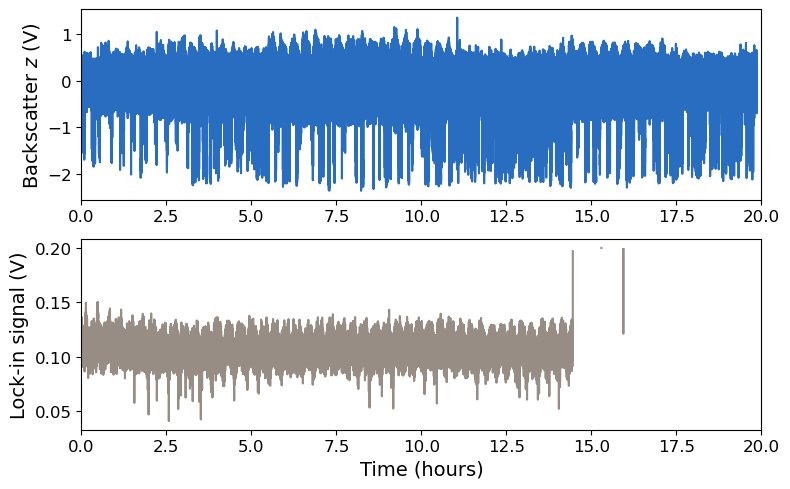

In [23]:
charge_all = np.concatenate(charge)
zz_all = np.concatenate(zz)

fig, axes = plt.subplots(2, 1, figsize=(8, 5))
axes[0].plot(np.arange(0, dtt*zz_all.size, dtt)/3600, zz_all, '#286dc0')
axes[1].plot(np.arange(0, dtt*zz_all.size, dtt)/3600, charge_all, '#978d85')

axes[0].set_ylabel('Backscatter $z$ (V)')
axes[1].set_xlabel('Time (hours)')
axes[1].set_ylabel('Lock-in signal (V)')
for ax in axes:
    ax.set_xlim(0, 20)

fig.tight_layout()

## Observed libration (?) peaks

In [27]:
file = r"D:\calibration\20240808_weird_peaks_2_6e-7mbar.mat"
dtt, tt, nn = load_timestreams(file, ['D'])

(0.0, 500.0)

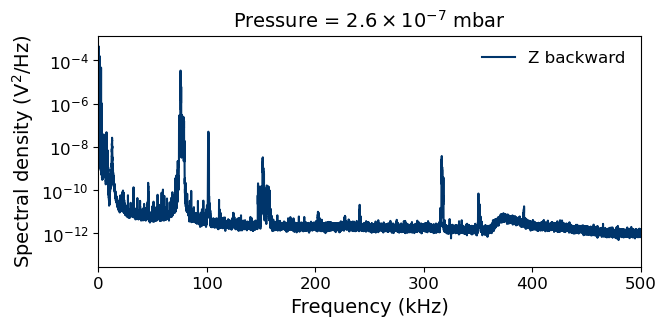

In [30]:
ffzb, ppzb= get_psd(dtt, None, nn[0], nperseg=500000)
plt.plot(ffzb/1000, ppzb, label='Z backward', color='#00356b')

plt.yscale('log')
plt.legend(frameon=False)
plt.xlabel('Frequency (kHz)')
plt.ylabel('Spectral density (V$^2$/Hz)')
plt.title(r'Pressure = $2.6 \times 10^{-7}$ mbar')
plt.xlim(0, 500)